In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install konlpy

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from konlpy.utils import pprint
from konlpy.tag import Okt
import torchtext
import re
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
okt = Okt()
from imblearn.over_sampling import SMOTE
from collections import Counter
from konlpy.tag import Mecab
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
okt = Okt()

# 경고문구 미표시
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
sel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/res_Tsherpa_final.csv')
sel_df

,0,1,2,3,4
0,수업을 살리는 체육 레시피,30시간,2023.10.24,5점,아이들과 함께 할 체육활동을 이번 연수를 통해 좀 더 다양한 방법에 대해 알 수 있...
1,파워포인트로 끝내는 교실 콘텐츠 창작 비법 노트,15시간,2023.10.24,5점,"이번 연수를 통하여 매일 인디에서 다운받아서 쓰던 학급이름표, 보드게임 형식 등을 ..."
2,교육과정을 뒤집다! 백워드 통합단원 설계,15시간,2023.10.24,5점,백워드에 대한 막연한 개념만 있었는데\r\n강좌를 통하여 지식과 이해에 대한 구체적...
3,파워포인트로 끝내는 교실 콘텐츠 창작 비법 노트,15시간,2023.10.23,5점,파워포인트로 이렇게 많은 것을 할 수 있다는 것을 새롭게 알게 되어서 많이 부끄럽습...
4,손그림과 파워포인트로 교실 속 콘텐츠 만들기,30시간,2023.10.23,5점,파워포인트 주로 사용하는데 매일 하던거만 하다 새로운걸 알아가네요~\r\n감사합니다~
...,...,...,...,...,...
1632,두근두근 교실밖 인문학 - 동양사편,30시간,2018.04.02,5점,평소 우리나라 역사에 대한 강의를 듣고 싶어 여러 원격교육을 받던 중 셀파 원격교육...
1633,수업을 살리는 놀이 레시피,30시간,2018.01.25,5점,어느 연수보다도 알찬 수업연수였습니다. 단순하게 이러한 방법을 활용할 수 있다라고 ...
1634,수업을 살리는 놀이 레시피,30시간,2018.01.13,5점,교사의 수업이란 예전과 다르게 조금만 지루해도 학생들이 잘 안따르고 듣지 않은 경우...
1635,교과수업에 활용하는 진로교육,30시간,2018.01.09,5점,"강의 내용도 훌륭했고, 동영상 구성이나 그래픽도 아주 훌륭했습니다. 강사님의 프레젠..."


In [ ]:
sel_df
sel_df.to_csv('sel_df.csv', encoding='cp949')

In [ ]:
sel_df.rename(columns={'2' : 'date',
                       '3' : 'star',
                       '4' : 'text'}, inplace=True)
sel_df

,0,1,date,star,text
0,수업을 살리는 체육 레시피,30시간,2023.10.24,5점,아이들과 함께 할 체육활동을 이번 연수를 통해 좀 더 다양한 방법에 대해 알 수 있...
1,파워포인트로 끝내는 교실 콘텐츠 창작 비법 노트,15시간,2023.10.24,5점,"이번 연수를 통하여 매일 인디에서 다운받아서 쓰던 학급이름표, 보드게임 형식 등을 ..."
2,교육과정을 뒤집다! 백워드 통합단원 설계,15시간,2023.10.24,5점,백워드에 대한 막연한 개념만 있었는데\r\n강좌를 통하여 지식과 이해에 대한 구체적...
3,파워포인트로 끝내는 교실 콘텐츠 창작 비법 노트,15시간,2023.10.23,5점,파워포인트로 이렇게 많은 것을 할 수 있다는 것을 새롭게 알게 되어서 많이 부끄럽습...
4,손그림과 파워포인트로 교실 속 콘텐츠 만들기,30시간,2023.10.23,5점,파워포인트 주로 사용하는데 매일 하던거만 하다 새로운걸 알아가네요~\r\n감사합니다~
...,...,...,...,...,...
1632,두근두근 교실밖 인문학 - 동양사편,30시간,2018.04.02,5점,평소 우리나라 역사에 대한 강의를 듣고 싶어 여러 원격교육을 받던 중 셀파 원격교육...
1633,수업을 살리는 놀이 레시피,30시간,2018.01.25,5점,어느 연수보다도 알찬 수업연수였습니다. 단순하게 이러한 방법을 활용할 수 있다라고 ...
1634,수업을 살리는 놀이 레시피,30시간,2018.01.13,5점,교사의 수업이란 예전과 다르게 조금만 지루해도 학생들이 잘 안따르고 듣지 않은 경우...
1635,교과수업에 활용하는 진로교육,30시간,2018.01.09,5점,"강의 내용도 훌륭했고, 동영상 구성이나 그래픽도 아주 훌륭했습니다. 강사님의 프레젠..."


In [ ]:
sel_df['star'].value_counts()

5점    1399
4점     180
3점      40
2점      11
1점       7
Name: star, dtype: int64

In [ ]:
bt3_filter_df = sel_df[sel_df['star'] == '3점']
bt2_filter_df = sel_df[sel_df['star'] == '2점']
bt1_filter_df = sel_df[sel_df['star'] == '1점']
df_concat1 = pd.concat([bt3_filter_df, bt2_filter_df, bt1_filter_df])
df_concat1


,0,1,date,star,text
15,세상에서 제일 쉬운 과학 이야기,30시간,2023.10.17,3점,연수는 참 재밌어요.\r\n평소 알고 있던 지식이 더 깊어지는 기분이구요.\r\n다...
20,"상상을 실천으로, 삶을 바꾸는 사회 수업 이야기",5시간,2023.10.12,3점,사회를 재미없어 하는 아이들을 흥미있게 지도할 수 있는 다양한 방법을 배울 수 있어...
22,수업이 즐거워지는 과학 교과서 활용 꿀팁 (초등 3~4학년),5시간,2023.10.12,3점,과학 교과서를 재미있게 활용할 수 있는 꿀팁들이 있어서 수업시간에 잘 활용할 수 있...
23,수업을 살리는 놀이 레시피,30시간,2023.10.12,3점,수업시간과 연계하여 놀이 활동을 할 수 있어서 수업이 지루하지 않고 재미있었습니다....
24,정훈쌤의 뚝딱 칼림바,15시간,2023.10.12,3점,창의적 체험활동 시간을 이용하여 1인 1악기 교육으로 칼림바수업을 진행했는데 음악을...
64,English Grammar in Use,30시간,2023.09.18,3점,3줄 요약\r\n1. 이지경선생님 강의가 좋아서 2탄도 들을 것이다.\r\n2. 연...
84,English Grammar in Use 2,30시간,2023.09.05,3점,"English Grammar in Use 1도 듣고 2도 들었는데, 2가 조금 더 ..."
126,'척' 하면 '딱' 붙는 대입 진학지도,15시간,2023.06.30,3점,아이들이 진학을 하도록 돕는 연수라 들었는데... 매번 느끼는것은 아이들이 먼저 움...
178,강의의 품격,30시간,2023.06.07,3점,구성이나 내용이 별로 마음에 안드네요. 음향도 그렇고. 실망스러운 연수였습니다.
218,수업을 살리는 놀이 레시피,30시간,2023.05.15,3점,학생수가 적은 경우엔느 도움이 될것 같습니다.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<Axes: >

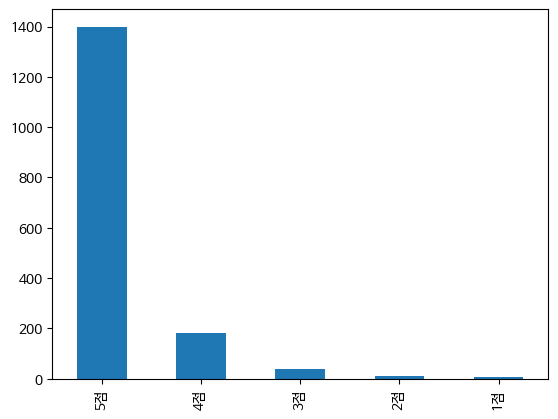

In [ ]:
sel_df['star'].value_counts().plot(kind='bar')

In [ ]:
sel_df.dtypes

0       object
1       object
date    object
star    object
text    object
dtype: object

In [ ]:
sel_df['date'] = pd.to_datetime(sel_df['date'])
sel_df.dtypes

0               object
1               object
date    datetime64[ns]
star            object
text            object
dtype: object

In [ ]:
t_filter_df = sel_df.query("date>='2023-07-22' and date<'2023-10-23'")
t_filter_df

,0,1,date,star,text
5,쉽게 배우고 활용하는 교실 속 손그림 그리기,15시간,2023-10-22,4점,도형을 이용해 간단하게 손그림 그리는 방법을 배우는 유익한 연수였어요..\r\n그런...
6,왕초보를 위한 캘리그래피,15시간,2023-10-19,5점,저는 미술에 정말 소질이 없는 사람입니다.. 그래서 아이들과 미술을 하는 것도 힘들...
7,같이 읽고 함께 나누는 독서수업방법,30시간,2023-10-19,5점,교직 생활이 연수가 늘어갈수록 다양한 독서 연수 강좌를 들어왔습니다. 이번 연수는 ...
8,학생들과 함께 나누는 기후변화 이야기,30시간,2023-10-18,5점,"근래 들어 정말 기분좋게, 즐겁게 들었던 연수입니다.\r\n환경인가? 하며 들었는데..."
9,독립운동 현장읽기 - 의병전쟁,15시간,2023-10-18,5점,우리나라를 위해 목숨을 바쳐 싸운 분들이 정말 많다는 것을 새롭게 알게 됐습니다.
...,...,...,...,...,...
105,재테크보다 중요한 나만의 재무설계,15시간,2023-08-21,5점,왜 제가 20대일 때는 이런 연수가 없었나 아쉽습니다. (있었는데 제가 몰랐던 것일...
106,어린이 생활세계로 열어가는 사회 교과서 이야기 (5~6학년),10시간,2023-08-21,5점,알찬 내용으로 채워진 아주 유익한 연수였습니다. 한가지 아주 소소한 얘기하나 드리고...
107,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023-08-21,4점,교사들도 여러 가지 질환에 많이 노출되고 실제 시달리는 분들도 많이 보았는데\r\n...
108,수업을 살리는 미술 레시피,30시간,2023-08-21,4점,유익한 미술 수업 정보로 수업에 활용도가 높습니다.


In [ ]:
t_filter_df.to_csv('t_filter_df.csv', encoding='cp949')

In [ ]:
t_filter_df['star'].value_counts()

5점    77
4점    17
3점     7
1점     3
2점     1
Name: star, dtype: int64

In [ ]:
t3_filter_df = t_filter_df[t_filter_df['star'] == '3점']
t2_filter_df = t_filter_df[t_filter_df['star'] == '2점']
t1_filter_df = t_filter_df[t_filter_df['star'] == '1점']
df_concat = pd.concat([t1_filter_df, t2_filter_df, t3_filter_df])
#1이 긍정, 0이 부정
df_concat.to_csv('셀파 부정 리뷰.csv', encoding='cp949')

In [ ]:
df_concat['text']

43                      스크립트 제공이 안됨. 화면 정지와 재생 버튼이 불편함.
83                   연수 내용은 유익하나 진도 반영이 제대로 되지 않아 비추천!!
95    상시 연수의 경우 배속을 조정할 수도 없고 일정한 시간을 채워야 이수 처리가 되어서...
31                                           여행 가고 싶네요.
15    연수는 참 재밌어요.\r\n평소 알고 있던 지식이 더 깊어지는 기분이구요.\r\n다...
20    사회를 재미없어 하는 아이들을 흥미있게 지도할 수 있는 다양한 방법을 배울 수 있어...
22    과학 교과서를 재미있게 활용할 수 있는 꿀팁들이 있어서 수업시간에 잘 활용할 수 있...
23    수업시간과 연계하여 놀이 활동을 할 수 있어서 수업이 지루하지 않고 재미있었습니다....
24    창의적 체험활동 시간을 이용하여 1인 1악기 교육으로 칼림바수업을 진행했는데 음악을...
64    3줄 요약\r\n1. 이지경선생님 강의가 좋아서 2탄도 들을 것이다.\r\n2. 연...
84    English Grammar in Use 1도 듣고 2도 들었는데, 2가 조금 더 ...
Name: text, dtype: object

In [ ]:
df_concat['text'] = df_concat['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df_concat['text'].replace('', np.nan, inplace=True)
df_concat = df_concat.dropna(axis=0)
print(df_concat.isnull().sum())
print('전처리 후 filter_df[text]의 개수 :', len(df_concat))


0       0
1       0
date    0
star    0
text    0
dtype: int64
전처리 후 filter_df[text]의 개수 : 11


In [ ]:
sample_content = df_concat['text'].iloc[0]
print(type(sample_content))
print(sample_content)

<class 'str'>
스크립트 제공이 안됨 화면 정지와 재생 버튼이 불편함


In [ ]:
token = okt.pos(sample_content)
pprint(token)

[('스크립트', 'Noun'),
 ('제공', 'Noun'),
 ('이', 'Josa'),
 ('안됨', 'Adjective'),
 ('화면', 'Noun'),
 ('정지', 'Noun'),
 ('와', 'Josa'),
 ('재생', 'Noun'),
 ('버튼', 'Noun'),
 ('이', 'Josa'),
 ('불편함', 'Adjective')]


In [ ]:
tokens = okt.morphs(sample_content)
pprint(tokens)

['스크립트', '제공', '이', '안됨', '화면', '정지', '와', '재생', '버튼', '이', '불편함']


In [ ]:
all_contents = df_concat['text'].iloc[:12]

In [ ]:
def stopword(x):
  result = []
  f = open("/content/drive/MyDrive/Colab Notebooks/불용어.txt", "r")
  stop_words = f.read().splitlines()
  for w in x:
    if w not in stop_words:
      result.append(w)

  return result

In [ ]:
df_concat['token'] = df_concat['text'].apply(okt.morphs)
df_concat['token'] = df_concat['token'].apply(lambda x: stopword(x))
df_concat

,0,1,date,star,text,token
43,메이슨의 Travel English,30시간,2023-10-02,1점,스크립트 제공이 안됨 화면 정지와 재생 버튼이 불편함,"[스크립트, 제공, 안됨, 화면, 정지, 재생, 버튼, 불편함]"
83,교사를 위한 교실 밖 여행인문학,15시간,2023-09-06,1점,연수 내용은 유익하나 진도 반영이 제대로 되지 않아 비추천,"[연수, 내용, 은, 유익하나, 진도, 반영, 제대로, 되지, 않아, 비, 추천]"
95,학생들과 함께 나누는 기후변화 이야기,30시간,2023-08-24,1점,상시 연수의 경우 배속을 조정할 수도 없고 일정한 시간을 채워야 이수 처리가 되어서...,"[상시, 연수, 경우, 배속, 조정, 할, 수도, 없고, 일정한, 채워야, 이수, ..."
31,나만의 여행책 만들기,30시간,2023-10-10,2점,여행 가고 싶네요,"[여행, 가고, 싶네요]"
15,세상에서 제일 쉬운 과학 이야기,30시간,2023-10-17,3점,연수는 참 재밌어요평소 알고 있던 지식이 더 깊어지는 기분이구요다만 시험문제가 어렵...,"[연수, 는, 재밌어요, 평소, 알, 고, 있던, 지식, 더, 깊어지는, 기분, 이..."
20,"상상을 실천으로, 삶을 바꾸는 사회 수업 이야기",5시간,2023-10-12,3점,사회를 재미없어 하는 아이들을 흥미있게 지도할 수 있는 다양한 방법을 배울 수 있어...,"[사회, 재미없어, 하는, 흥미, 있게, 지도, 할, 수, 있는, 다양한, 방법, ..."
22,수업이 즐거워지는 과학 교과서 활용 꿀팁 (초등 3~4학년),5시간,2023-10-12,3점,과학 교과서를 재미있게 활용할 수 있는 꿀팁들이 있어서 수업시간에 잘 활용할 수 있...,"[과학, 교과서, 재미있게, 활용, 할, 수, 있는, 꿀팁, 있어서, 수업, 잘, ..."
23,수업을 살리는 놀이 레시피,30시간,2023-10-12,3점,수업시간과 연계하여 놀이 활동을 할 수 있어서 수업이 지루하지 않고 재미있었습니다특...,"[수업, 연, 계, 놀이, 활동, 할, 수, 있어서, 수업, 지루하지, 않고, 재미..."
24,정훈쌤의 뚝딱 칼림바,15시간,2023-10-12,3점,창의적 체험활동 시간을 이용하여 인 악기 교육으로 칼림바수업을 진행했는데 음악을 잘...,"[창의, 적, 체험, 활동, 이용, 하여, 인, 악기, 교육, 칼림바, 수업, 진행..."
64,English Grammar in Use,30시간,2023-09-18,3점,줄 요약 이지경선생님 강의가 좋아서 탄도 들을 것이다 연수 플랫폼 오류문제 평가문항...,"[줄, 요약, 지, 경, 선생님, 강의, 좋아서, 탄도, 들을, 이다, 연수, 플랫..."


In [ ]:
neg_df_dict = dict()
# neg_df: 토큰화된 데이터로 이루어진 데이터프레임
for neg in df_concat['token']:
    for neg_word in neg:
        # 해당 토큰이 한 글자면 제외
        if len(neg_word) == 1:
          continue
        if neg_word not in ['문제', '버튼', '않아', '오류', '신청', '평가',
                            '개선', '태블릿', '스킵', '화면', '진도', '반영',
                            '처리', '반영', '이수', 'PC', '틀렸다고', '불편함',
                            '스크립트', '배속', '불편함이', '오류로', '해결', '않음', '준비물',
                            '없이도', '황당했어요', '미완료']:
          continue
        # 해당 토큰이 딕셔너리에 없으면 키값으로 할당
        if neg_word not in neg_df_dict:
            neg_df_dict[neg_word] = 0
        # 해당 토큰 개수 세기
        neg_df_dict[neg_word] += 1


freq_neg = sorted(neg_df_dict.items(), key=lambda x: x[1], reverse = True)
freq_neg_dict = dict(freq_neg)
freq_neg_dict

{'문제': 7,
 '버튼': 3,
 '않아': 3,
 '오류': 3,
 '신청': 3,
 '평가': 3,
 '개선': 3,
 '태블릿': 3,
 '스킵': 3,
 '화면': 2,
 '진도': 2,
 '반영': 2,
 '이수': 2,
 '처리': 2,
 '틀렸다고': 2,
 '스크립트': 1,
 '불편함': 1,
 '배속': 1,
 '불편함이': 1,
 '오류로': 1,
 '해결': 1,
 '않음': 1,
 '준비물': 1,
 '없이도': 1,
 '미완료': 1,
 '황당했어요': 1}

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f  in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf']

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname = path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


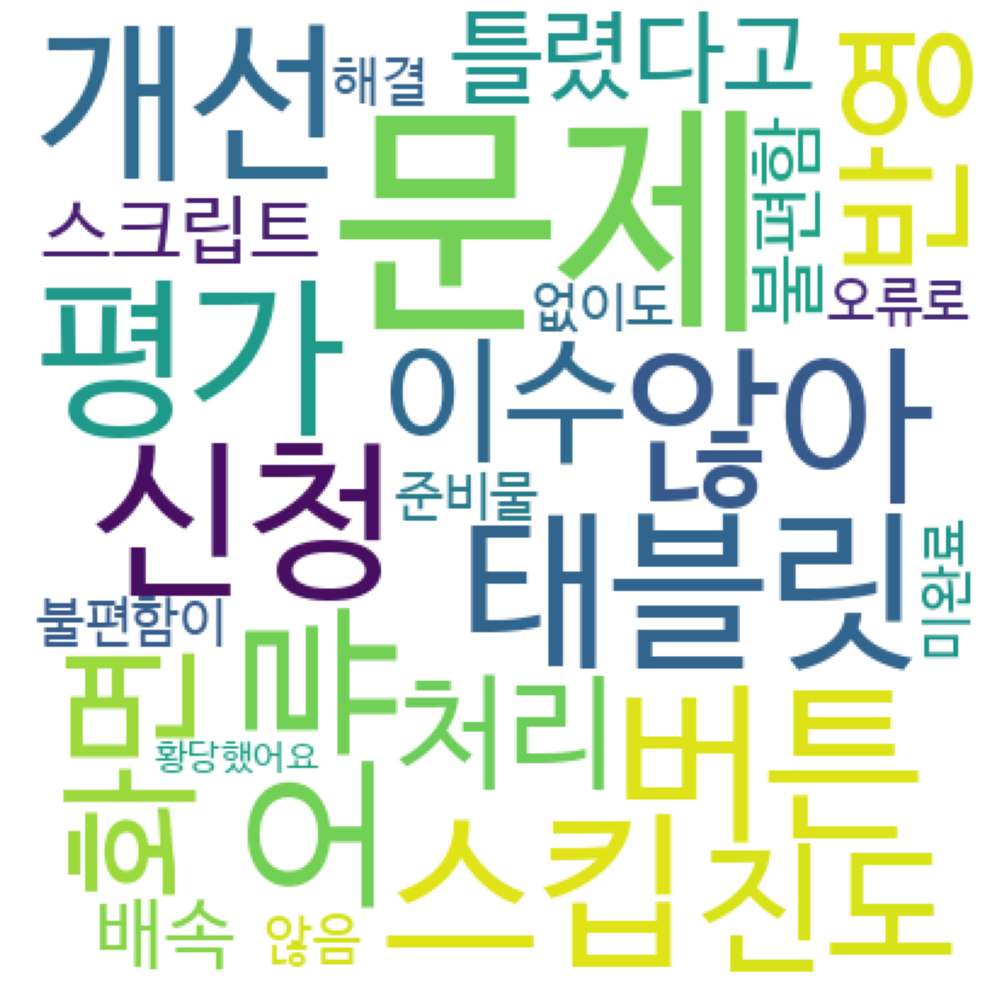

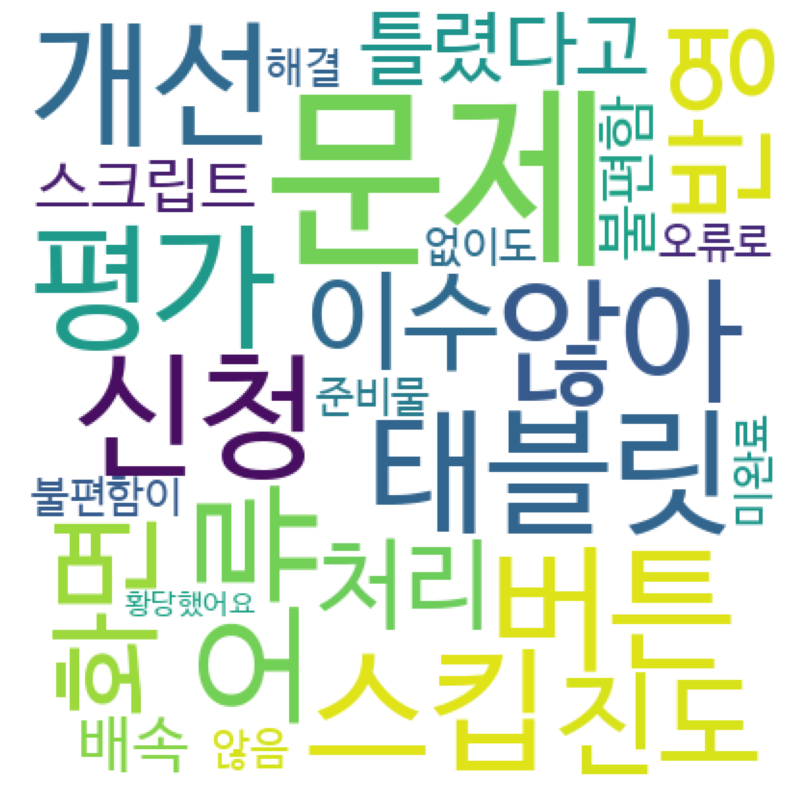

In [ ]:
from collections import Counter

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 400, height= 400,
                      background_color='white',
                      stopwords = set(STOPWORDS),
                      max_words=300,
                      max_font_size = 100,
                      font_path = path
                      ).generate_from_frequencies(freq_neg_dict)
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(wordcloud) # 결과 보여주기
plt.savefig('t셀파_워드클라우드(negative)') # 파일 저장

In [ ]:
#카테고리 자체는 시스템적인 문제가 발발했다
# 화면정지 그리고 재생 버튼에 대한 불만
# 배속설정이라던지, 이러한 오류와 개선부분이 필요한 것으로 보인다.
# 연수플랫폼에 대한 자체적인 문제와. 평가문항 답안 처리 문제
# 뿐만 아니라 태블릿에서도 실행이 될 수 있게끔 개선사항이 필요해 보인다.

In [ ]:
t_filter_df.to_csv('filter_셀파.csv', encoding='cp949')


In [ ]:
t_filter_df['text'] = t_filter_df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
t_filter_df['text'].replace('', np.nan, inplace=True)
t_filter_df = t_filter_df.dropna(axis=0)
print(t_filter_df.isnull().sum())
print('전처리 후 filter_df[text]의 개수 :', len(t_filter_df))



0       0
1       0
date    0
star    0
text    0
dtype: int64
전처리 후 filter_df[text]의 개수 : 105


In [ ]:
def stopword(x):
  result = []
  f = open("/content/drive/MyDrive/Colab Notebooks/불용어.txt", "r")
  stop_words = f.read().splitlines()
  for w in x:
    if w not in stop_words:
      result.append(w)

  return result

In [ ]:
t_filter_df['token'] = t_filter_df['text'].apply(okt.morphs)
t_filter_df['token'] = t_filter_df['token'].apply(lambda x: stopword(x))
t_filter_df

,0,1,date,star,text,token
5,쉽게 배우고 활용하는 교실 속 손그림 그리기,15시간,2023-10-22,4점,도형을 이용해 간단하게 손그림 그리는 방법을 배우는 유익한 연수였어요그런데 프로그램...,"[도형, 이용, 해, 간단하게, 손, 그림, 그리는, 방법, 배우는, 유익한, 연수..."
6,왕초보를 위한 캘리그래피,15시간,2023-10-19,5점,저는 미술에 정말 소질이 없는 사람입니다 그래서 아이들과 미술을 하는 것도 힘들어하...,"[는, 미술, 정말, 소질, 없는, 사람, 입니다, 미술, 하는, 도, 힘들어하고,..."
7,같이 읽고 함께 나누는 독서수업방법,30시간,2023-10-19,5점,교직 생활이 연수가 늘어갈수록 다양한 독서 연수 강좌를 들어왔습니다 이번 연수는 학...,"[교직, 생활, 연수, 늘어, 갈수록, 다양한, 독서, 연수, 강좌, 들어왔습니다,..."
8,학생들과 함께 나누는 기후변화 이야기,30시간,2023-10-18,5점,근래 들어 정말 기분좋게 즐겁게 들었던 연수입니다환경인가 하며 들었는데 다시 지구과...,"[근래, 들어, 정말, 기분, 좋게, 즐겁게, 들었던, 연수, 입니다, 환경, 인가..."
9,독립운동 현장읽기 - 의병전쟁,15시간,2023-10-18,5점,우리나라를 위해 목숨을 바쳐 싸운 분들이 정말 많다는 것을 새롭게 알게 됐습니다,"[우리나라, 위해, 목숨, 바쳐, 싸운, 분, 정말, 많다는, 새롭게, 알, 게, ..."
...,...,...,...,...,...,...
105,재테크보다 중요한 나만의 재무설계,15시간,2023-08-21,5점,왜 제가 대일 때는 이런 연수가 없었나 아쉽습니다 있었는데 제가 몰랐던 것일까요 소...,"[대일, 는, 연수, 없었나, 아쉽습니다, 있었는데, 몰랐던, 일까, 요, 소비, ..."
106,어린이 생활세계로 열어가는 사회 교과서 이야기 (5~6학년),10시간,2023-08-21,5점,알찬 내용으로 채워진 아주 유익한 연수였습니다 한가지 아주 소소한 얘기하나 드리고자...,"[알찬, 내용, 채워진, 아주, 유익한, 연수, 였습니다, 한가지, 아주, 소소한,..."
107,7인의 전문의와 함께하는 메디컬 콘서트,30시간,2023-08-21,4점,교사들도 여러 가지 질환에 많이 노출되고 실제 시달리는 분들도 많이 보았는데여러 염...,"[교사, 도, 여러, 가지, 질환, 많이, 노출, 되고, 실제, 시달리는, 분, 도..."
108,수업을 살리는 미술 레시피,30시간,2023-08-21,4점,유익한 미술 수업 정보로 수업에 활용도가 높습니다,"[유익한, 미술, 수업, 정보, 수업, 활, 용도, 높습니다]"


In [ ]:
pos_df_dict1 = dict()
# neg_df: 토큰화된 데이터로 이루어진 데이터프레임
for pos in t_filter_df['token']:
    for pos_word in pos:
        # 해당 토큰이 한 글자면 제외
        if len(pos_word) == 1:
          continue
        if pos_word in ['연수', '수업', '있는', '강의', '활용', '생각', '선생님']:
          continue
        # 해당 토큰이 딕셔너리에 없으면 키값으로 할당
        if pos_word not in pos_df_dict1:
            pos_df_dict1[pos_word] = 0
        # 해당 토큰 개수 세기
        pos_df_dict1[pos_word] += 1


freq_neg2 = sorted(pos_df_dict1.items(), key=lambda x: x[1], reverse = True)
freq_neg_dict2 = dict(freq_neg2)
freq_neg_dict2

{'하고': 30,
 '내용': 25,
 '도움': 24,
 '하는': 23,
 '합니다': 20,
 '너무': 20,
 '감사합니다': 20,
 '이야기': 20,
 '활동': 19,
 '좋은': 18,
 '많은': 18,
 '놀이': 18,
 '되었습니다': 17,
 '방법': 16,
 '많이': 16,
 '입니다': 15,
 '마음': 15,
 '추천': 15,
 '있어서': 15,
 '학생': 15,
 '대해': 15,
 '좋았습니다': 14,
 '실제': 14,
 '해서': 14,
 '다양한': 14,
 '같습니다': 14,
 '교육': 14,
 '정말': 13,
 '고민': 13,
 '였습니다': 13,
 '유익한': 12,
 '신청': 12,
 '강사': 12,
 '적용': 12,
 '교사': 12,
 '하여': 12,
 '통해': 12,
 '공부': 12,
 '하게': 11,
 '하며': 11,
 '설명': 11,
 '듣고': 11,
 '이해': 11,
 '에도': 11,
 '그림': 10,
 '사용': 10,
 '지도': 10,
 '시작': 9,
 '진행': 9,
 '다시': 9,
 '문제': 9,
 '되어': 9,
 '되지': 8,
 '있도록': 8,
 '생활': 8,
 '자료': 8,
 '재미': 8,
 '모습': 8,
 '있을': 8,
 '여러': 8,
 '부분': 8,
 '흥미': 8,
 '않고': 8,
 '보다': 8,
 '여행': 8,
 '있어': 8,
 '진로': 8,
 '있고': 8,
 '수학': 8,
 '이용': 7,
 '미술': 7,
 '쉽게': 7,
 '이었습니다': 7,
 '경험': 7,
 '실천': 7,
 '싶은': 7,
 '되는': 7,
 '같아요': 7,
 '있게': 7,
 '됩니다': 7,
 '하기': 7,
 '이렇게': 7,
 '관심': 7,
 '해야': 7,
 '정보': 7,
 '노력': 7,
 '있습니다': 7,
 '지역': 7,
 '관련': 7,
 '사이트': 7,
 '하지': 6,
 '특히': 6,
 '들었

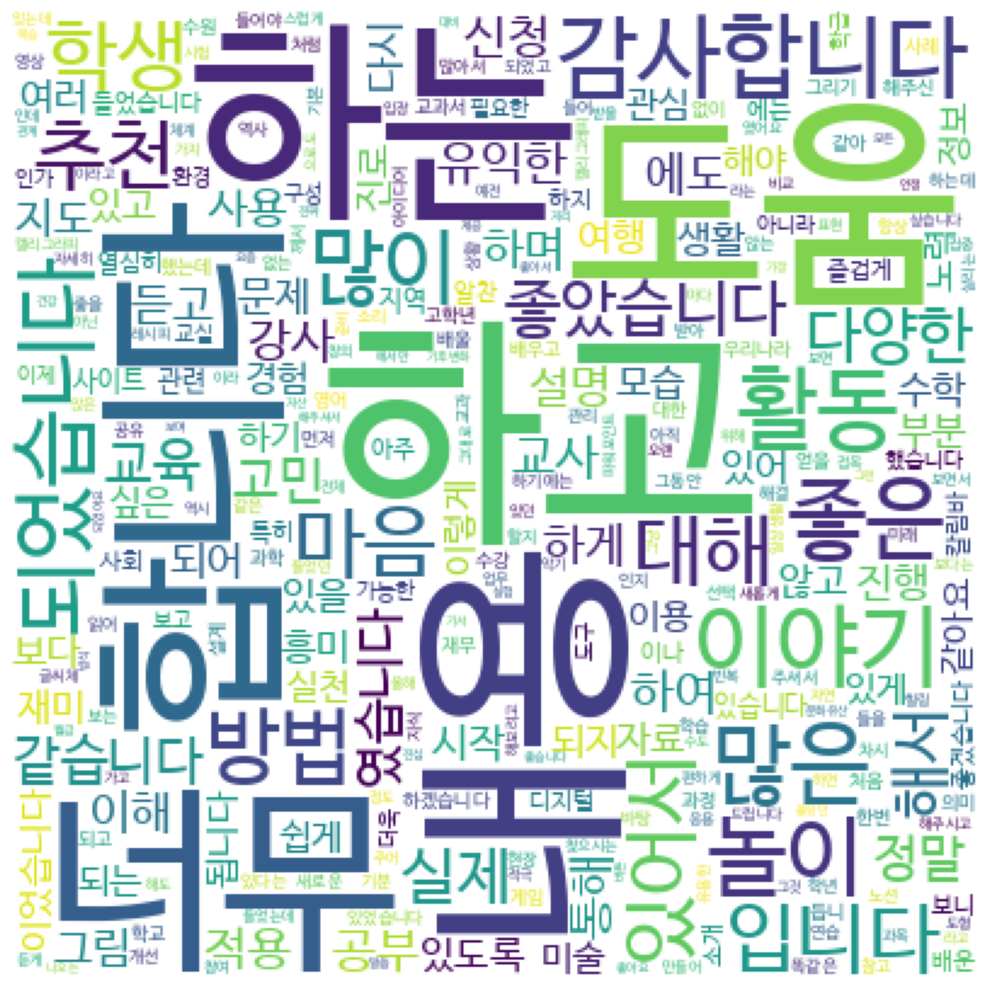

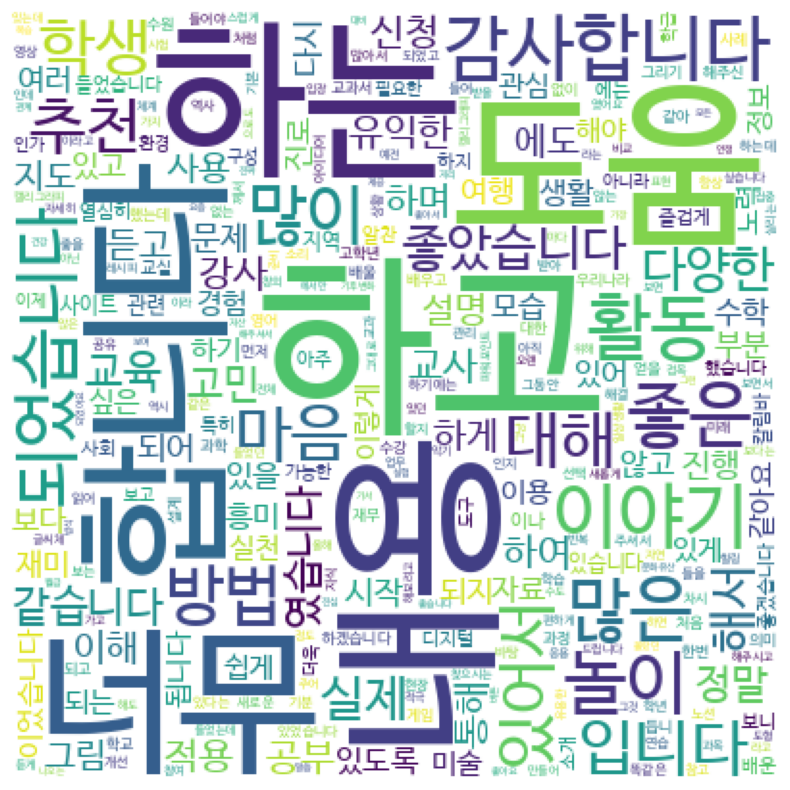

In [ ]:
from collections import Counter

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 400, height= 400,
                      background_color='white',
                      stopwords = set(STOPWORDS),
                      max_words=300,
                      max_font_size = 100,
                      font_path = path
                      ).generate_from_frequencies(freq_neg_dict2)
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(wordcloud) # 결과 보여주기
plt.savefig('t셀파_워드클라우드(positive)') # 파일 저장